In [1]:
# Import necessary modules

%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt
import asyncio
# from scipy.fftpack import fft

LOG.propagate = False

In [13]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2024-05-15 19:02:26,032 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:89:c5:6d:2f:4b
2024-05-15 19:02:30,109 | INFO     |: Connected to c0:89:c5:6d:2f:4b


In [3]:
def PID_SET(Kp, Ki, Kd):
    ble.send_command(CMD.KP_SET, str(Kp))
    ble.send_command(CMD.KI_SET, str(Ki))
    ble.send_command(CMD.KD_SET, str(Kd))

In [4]:
Kp_ToF = 0.25
Ki_ToF = 0.001
Kd_ToF = 50
Kp_IMU = 5
Ki_IMU = 0.01
Kd_IMU = 500

#### ToF PID

In [5]:
tof_reading = []   # Stores the sensor reading in millimeters
pid_ctrl = []
p_ctrl = []
i_ctrl = []
d_ctrl = []
pid_error = []
timestamp = []      # Timestamps in milliseconds

def notification_handler(uuid, byte_array):
    tof_reading.append(((int) (ble.bytearray_to_string(byte_array).split(", ")[0])))
    pid_ctrl.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[2])))
    p_ctrl.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[3])))
    i_ctrl.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[4])))
    d_ctrl.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[5])))
    pid_error.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[6])))
    timestamp.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[-1])))

ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [44]:
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [51]:
tof_reading.clear()
pid_ctrl.clear()
p_ctrl.clear()
i_ctrl.clear()
d_ctrl.clear()
pid_error.clear()
timestamp.clear()

PID_SET(Kp_ToF, Ki_ToF, Kd_ToF)
ble.send_command(CMD.REF_POS_SET, "2360")
ble.send_command(CMD.START_TOF_PID, "")

In [52]:
ble.send_command(CMD.STOP_TOF_PID, "")

In [50]:
ble.send_command(CMD.GET_TOF_PID_INFO, "")

In [34]:
timestamp[-1]-timestamp[0]

1756.0

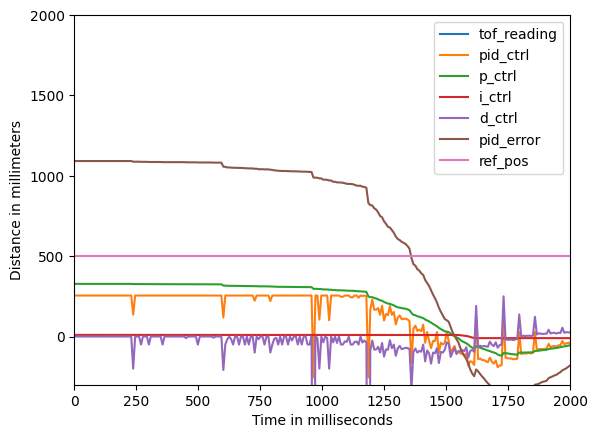

In [35]:
tof_N = len(tof_reading)

# Time domain figure
time = np.linspace(0., (timestamp[-1] - timestamp[0]), num=tof_N)
plt.plot(time, tof_reading, label='tof_reading')
plt.plot(time, pid_ctrl, label='pid_ctrl')
plt.plot(time, p_ctrl, label='p_ctrl')
plt.plot(time, i_ctrl, label='i_ctrl')
plt.plot(time, d_ctrl, label='d_ctrl')
plt.plot(time, pid_error, label='pid_error')
plt.plot(time, np.linspace(500, 500, num=tof_N), label='ref_pos')
plt.legend()
plt.title('')
plt.xlim(0, 2000)
plt.ylim(-300, 2000)
plt.xlabel('Time in milliseconds')
plt.ylabel('Distance in millimeters')
plt.show()

#### IMU PID

In [13]:
PID_SET(Kp_IMU, Ki_IMU, Kd_IMU)
ble.send_command(CMD.START_IMU_PID, "")
ble.send_command(CMD.REF_ANGLE_SET, "180")

In [14]:
ble.send_command(CMD.STOP_IMU_PID, "")

#### Trajectory Following

In [85]:
# 1. (-4, -3)    <--start

# Rotate
PID_SET(Kp_IMU, Ki_IMU, Kd_IMU)
ble.send_command(CMD.START_IMU_PID, "")
ble.send_command(CMD.REF_ANGLE_SET, "-45")

In [86]:
ble.send_command(CMD.STOP_IMU_PID, "")

In [87]:
# Move
PID_SET(Kp_ToF, Ki_ToF, Kd_ToF)
ble.send_command(CMD.REF_POS_SET, "2360")
ble.send_command(CMD.START_TOF_PID, "")

In [88]:
ble.send_command(CMD.STOP_TOF_PID, "")

In [89]:
# 2. (-2, -1)

# Rotate
PID_SET(Kp_IMU, Ki_IMU, Kd_IMU)
ble.send_command(CMD.START_IMU_PID, "")
ble.send_command(CMD.REF_ANGLE_SET, "45")

In [90]:
ble.send_command(CMD.STOP_IMU_PID, "")

In [91]:
# Move
PID_SET(Kp_ToF, Ki_ToF, Kd_ToF)
ble.send_command(CMD.REF_POS_SET, "1666")
ble.send_command(CMD.START_TOF_PID, "")

In [92]:
ble.send_command(CMD.STOP_TOF_PID, "")

In [95]:
# 3. (1, -1)

# Rotate
PID_SET(Kp_IMU, Ki_IMU, Kd_IMU)
ble.send_command(CMD.START_IMU_PID, "")
ble.send_command(CMD.REF_ANGLE_SET, "45")

In [96]:
ble.send_command(CMD.STOP_IMU_PID, "")

In [ ]:
# 1. (-4, -3)    <--start

# Rotate
PID_SET(Kp_IMU, Ki_IMU, Kd_IMU)
ble.send_command(CMD.START_IMU_PID, "")
ble.send_command(CMD.REF_ANGLE_SET, "-90")

In [ ]:
ble.send_command(CMD.STOP_IMU_PID, "")

In [ ]:
# Move
PID_SET(Kp_ToF, Ki_ToF, Kd_ToF)
ble.send_command(CMD.REF_POS_SET, "447")
ble.send_command(CMD.START_TOF_PID, "")

In [ ]:
ble.send_command(CMD.STOP_TOF_PID, "")

In [ ]:
# 1.5 (-4, -1)

# Rotate
PID_SET(Kp_IMU, Ki_IMU, Kd_IMU)
ble.send_command(CMD.START_IMU_PID, "")
ble.send_command(CMD.REF_ANGLE_SET, "90")

In [ ]:
ble.send_command(CMD.STOP_IMU_PID, "")

In [ ]:
# Move
PID_SET(Kp_ToF, Ki_ToF, Kd_ToF)
ble.send_command(CMD.REF_POS_SET, "2581")
ble.send_command(CMD.START_TOF_PID, "")

In [63]:
ble.send_command(CMD.STOP_TOF_PID, "")

In [64]:
# 2. (-2, -1)

# Move
PID_SET(Kp_ToF, Ki_ToF, Kd_ToF)
ble.send_command(CMD.REF_POS_SET, "1666")
ble.send_command(CMD.START_TOF_PID, "")

In [ ]:
ble.send_command(CMD.STOP_TOF_PID, "")

In [97]:
# 3. (1, -1)

# Move
PID_SET(Kp_ToF, Ki_ToF, Kd_ToF)
ble.send_command(CMD.REF_POS_SET, "636")
ble.send_command(CMD.START_TOF_PID, "")

In [98]:
ble.send_command(CMD.STOP_TOF_PID, "")

In [99]:
# 4. (2, -3)

# Rotate
PID_SET(Kp_IMU, Ki_IMU, Kd_IMU)
ble.send_command(CMD.START_IMU_PID, "")
ble.send_command(CMD.REF_ANGLE_SET, "-45")

In [100]:
ble.send_command(CMD.STOP_IMU_PID, "")

In [101]:
# Move
PID_SET(Kp_ToF, Ki_ToF, Kd_ToF)
ble.send_command(CMD.REF_POS_SET, "447")
ble.send_command(CMD.START_TOF_PID, "")

In [102]:
ble.send_command(CMD.STOP_TOF_PID, "")

In [103]:
# 5. (5, -3)

# Rotate
PID_SET(Kp_IMU, Ki_IMU, Kd_IMU)
ble.send_command(CMD.START_IMU_PID, "")
ble.send_command(CMD.REF_ANGLE_SET, "-90")

In [104]:
ble.send_command(CMD.STOP_IMU_PID, "")

In [105]:
# Move
PID_SET(Kp_ToF, Ki_ToF, Kd_ToF)
ble.send_command(CMD.REF_POS_SET, "1971")
ble.send_command(CMD.START_TOF_PID, "")

In [106]:
ble.send_command(CMD.STOP_TOF_PID, "")

In [107]:
# 6. (5, -2)

# Move
PID_SET(Kp_ToF, Ki_ToF, Kd_ToF)
ble.send_command(CMD.REF_POS_SET, "447")
ble.send_command(CMD.START_TOF_PID, "")

In [108]:
ble.send_command(CMD.STOP_TOF_PID, "")

In [109]:
# 7. (5, 3)

# Rotate
PID_SET(Kp_IMU, Ki_IMU, Kd_IMU)
ble.send_command(CMD.START_IMU_PID, "")
ble.send_command(CMD.REF_ANGLE_SET, "-90")

In [110]:
ble.send_command(CMD.STOP_IMU_PID, "")

In [111]:
# Move
PID_SET(Kp_ToF, Ki_ToF, Kd_ToF)
ble.send_command(CMD.REF_POS_SET, "752")
ble.send_command(CMD.START_TOF_PID, "")

In [112]:
ble.send_command(CMD.STOP_TOF_PID, "")

In [113]:
# 8. (0, 3)

# Rotate
PID_SET(Kp_IMU, Ki_IMU, Kd_IMU)
ble.send_command(CMD.START_IMU_PID, "")
ble.send_command(CMD.REF_ANGLE_SET, "-90")

In [114]:
ble.send_command(CMD.STOP_IMU_PID, "")

In [115]:
# Move
PID_SET(Kp_ToF, Ki_ToF, Kd_ToF)
ble.send_command(CMD.REF_POS_SET, "752")
ble.send_command(CMD.START_TOF_PID, "")

In [116]:
ble.send_command(CMD.STOP_TOF_PID, "")

In [ ]:
# 9. (0, 0)      <--end

#### Trajectory Following (Auto)

In [14]:
# 1. (-4, -3)    <--start
# Rotate
PID_SET(Kp_IMU, Ki_IMU, Kd_IMU)
ble.send_command(CMD.START_IMU_PID, "")
ble.send_command(CMD.REF_ANGLE_SET, "-45")
asyncio.run(asyncio.sleep(2))
ble.send_command(CMD.STOP_IMU_PID, "")

# Move
PID_SET(Kp_ToF, Ki_ToF, Kd_ToF)
ble.send_command(CMD.REF_POS_SET, "2360")
ble.send_command(CMD.START_TOF_PID, "")
asyncio.run(asyncio.sleep(2))
ble.send_command(CMD.STOP_TOF_PID, "")


# 2. (-2, -1)
# Rotate
PID_SET(Kp_IMU, Ki_IMU, Kd_IMU)
ble.send_command(CMD.START_IMU_PID, "")
ble.send_command(CMD.REF_ANGLE_SET, "45")
asyncio.run(asyncio.sleep(2))
ble.send_command(CMD.STOP_IMU_PID, "")

# Move
PID_SET(Kp_ToF, Ki_ToF, Kd_ToF)
ble.send_command(CMD.REF_POS_SET, "1666")
ble.send_command(CMD.START_TOF_PID, "")
asyncio.run(asyncio.sleep(2))
ble.send_command(CMD.STOP_TOF_PID, "")


# 3. (1, -1)
# Rotate
PID_SET(Kp_IMU, Ki_IMU, Kd_IMU)
ble.send_command(CMD.START_IMU_PID, "")
ble.send_command(CMD.REF_ANGLE_SET, "45")
asyncio.run(asyncio.sleep(2))
ble.send_command(CMD.STOP_IMU_PID, "")

# Move
PID_SET(Kp_ToF, Ki_ToF, Kd_ToF)
ble.send_command(CMD.REF_POS_SET, "636")
ble.send_command(CMD.START_TOF_PID, "")
asyncio.run(asyncio.sleep(2))
ble.send_command(CMD.STOP_TOF_PID, "")


# 4. (2, -3)
# Rotate
PID_SET(Kp_IMU, Ki_IMU, Kd_IMU)
ble.send_command(CMD.START_IMU_PID, "")
ble.send_command(CMD.REF_ANGLE_SET, "-45")
asyncio.run(asyncio.sleep(2))
ble.send_command(CMD.STOP_IMU_PID, "")

# Move
PID_SET(Kp_ToF, Ki_ToF, Kd_ToF)
ble.send_command(CMD.REF_POS_SET, "447")
ble.send_command(CMD.START_TOF_PID, "")
asyncio.run(asyncio.sleep(2))
ble.send_command(CMD.STOP_TOF_PID, "")


# 5. (5, -3)
# Rotate
PID_SET(Kp_IMU, Ki_IMU, Kd_IMU)
ble.send_command(CMD.START_IMU_PID, "")
ble.send_command(CMD.REF_ANGLE_SET, "-90")
asyncio.run(asyncio.sleep(2))
ble.send_command(CMD.STOP_IMU_PID, "")

# Move
PID_SET(Kp_ToF, Ki_ToF, Kd_ToF)
ble.send_command(CMD.REF_POS_SET, "1971")
ble.send_command(CMD.START_TOF_PID, "")
asyncio.run(asyncio.sleep(2))
ble.send_command(CMD.STOP_TOF_PID, "")


# 6. (5, -2)
# Move
PID_SET(Kp_ToF, Ki_ToF, Kd_ToF)
ble.send_command(CMD.REF_POS_SET, "447")
ble.send_command(CMD.START_TOF_PID, "")
asyncio.run(asyncio.sleep(2))
ble.send_command(CMD.STOP_TOF_PID, "")


# 7. (5, 3)
# Rotate
PID_SET(Kp_IMU, Ki_IMU, Kd_IMU)
ble.send_command(CMD.START_IMU_PID, "")
ble.send_command(CMD.REF_ANGLE_SET, "-90")
asyncio.run(asyncio.sleep(2))
ble.send_command(CMD.STOP_IMU_PID, "")

# Move
PID_SET(Kp_ToF, Ki_ToF, Kd_ToF)
ble.send_command(CMD.REF_POS_SET, "752")
ble.send_command(CMD.START_TOF_PID, "")
asyncio.run(asyncio.sleep(2))
ble.send_command(CMD.STOP_TOF_PID, "")


# 8. (0, 3)
# Rotate
PID_SET(Kp_IMU, Ki_IMU, Kd_IMU)
ble.send_command(CMD.START_IMU_PID, "")
ble.send_command(CMD.REF_ANGLE_SET, "-90")
asyncio.run(asyncio.sleep(2))
ble.send_command(CMD.STOP_IMU_PID, "")

# Move
PID_SET(Kp_ToF, Ki_ToF, Kd_ToF)
ble.send_command(CMD.REF_POS_SET, "752")
ble.send_command(CMD.START_TOF_PID, "")
asyncio.run(asyncio.sleep(2))
ble.send_command(CMD.STOP_TOF_PID, "")


# 9. (0, 0)       <--end

2024-05-15 19:03:44,168 | INFO     |: Disconnected from C0:89:C5:6D:2F:4B


OSError: [WinError -2147023673] The operation was canceled by the user